In [38]:
import numpy as np
from matplotlib.pyplot import * 
from math import sqrt
import numba
import scipy.signal
from statsmodels.graphics.tsaplots import plot_acf

/home/carmen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [64]:
@numba.jit(nopython=True)
def colored_noise_euler_integration(x_0, tau, c, D, dt=0.001, t_stop=101):
    """
    Use Euler integration to solve ODEs
    """    
    mu=np.exp(-dt/tau)
    sigma= sqrt( ((c * tau)/2) * (1-mu**2) )
    
    # Time points
    t = np.linspace(0, t_stop, int(t_stop/dt))
    
    # Initialize output array
    x = x_0 * np.ones_like(t)
    
    for i in range(0, len(t) - 1):
        x[i+1] = x[i]* mu + sigma * np.random.normal()
        
    return t, x

In [65]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

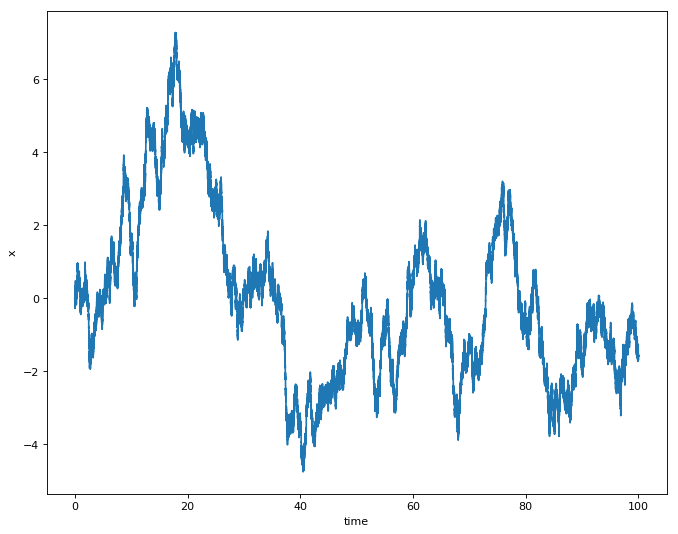

In [94]:
# Specify parameters
x_0 = 0
tau = 10
c=1
dt=10e-6
D=0.08
t_stop=100
# Perform the solution
t, x = colored_noise_euler_integration(x_0, tau, c, D, dt, t_stop)
indexes=[int(t/dt) for t in range(0,t_stop)]
# Plot the result
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot(t, x)
xlabel('time')
ylabel('x')
show()

In [27]:
def autocorrelation(x):
    result = scipy.signal.correlate(x, x, mode='full')
    result=result[result.size/2:]
    return result/result[0]

In [25]:
def autocorr_function(f):
    temp = np.correlate(f, f, mode='full')
    mid =temp.size/2
    print(mid)
    return temp[int(mid):]

In [30]:
x_autocorr=[]
for tau in range(1,5):
    t, x = colored_noise_euler_integration(x_0, tau, c, dt, t_stop)
    x_autocorr.append(x)

In [32]:
autocorr_x=[]
for x in x_autocorr:
    autocorr_x.append(estimated_autocorrelation(x))

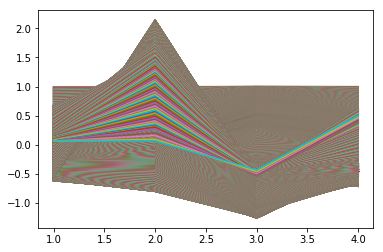

In [33]:
plot(range(1,5),autocorr_x)
show()

In [ ]:
autocorr=autocorr_function(x)
plot(t,autocorr)
show()

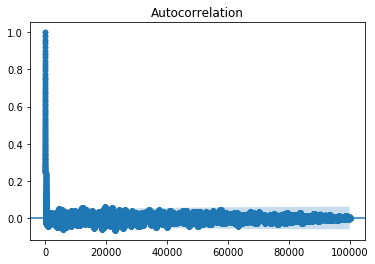

In [90]:
plot_acf(x)
show()